In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv('MovieLensRawData/ratings.csv')
ratings.shape

(27753444, 4)

In [3]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [4]:
len(ratings[['userId', 'movieId']])-len(ratings[['userId', 'movieId']].drop_duplicates())

0

In [5]:
len(ratings.userId.unique())*len(ratings.movieId.unique())
15262873692

15262873692

In [6]:
print(f"Users: {len(ratings.userId.unique())}")
print(f"Movies: {len(ratings.movieId.unique())}")



Users: 283228
Movies: 53889


# Look at number of ratings a movie has

Total number of movies: 53889


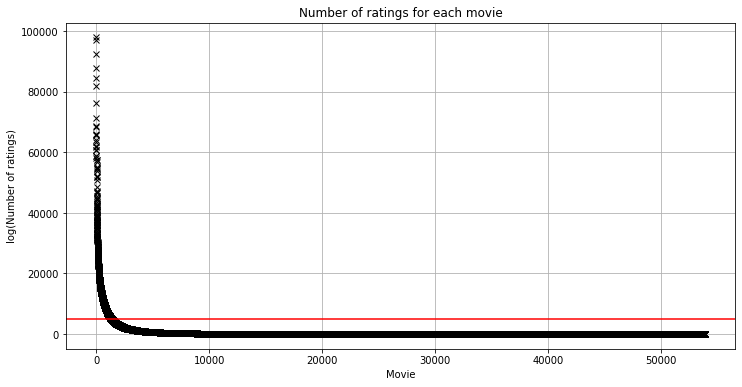

MovieId - 318 
Ratings received:  97999 

MovieId - 356 
Ratings received:  97040 

MovieId - 296 
Ratings received:  92406 

MovieId - 593 
Ratings received:  87899 

MovieId - 2571 
Ratings received:  84545 



In [7]:
movie_value_counts = ratings.movieId.value_counts(sort=True)

print(f"Total number of movies: {len(movie_value_counts)}")

plt.figure(figsize=(12,6))
plt.plot(np.arange(len(movie_value_counts)), movie_value_counts, 'xk')
# plt.yscale('log')
plt.title('Number of ratings for each movie')
plt.xlabel('Movie')
plt.ylabel('log(Number of ratings)')
plt.axhline(5000, c='red')

plt.grid('on')
plt.show()

for i in range(5):
    print("MovieId -", movie_value_counts.index[i], "\nRatings received: ", movie_value_counts.values[i],"\n")

# del(movie_value_counts)

In [8]:
m_threshold = 5000

n_movies = len(movie_value_counts[movie_value_counts>=m_threshold])

print("Number of movies with more than {n} ratings received: {m}".format(n=m_threshold, m=n_movies))

Number of movies with more than 5000 ratings received: 1344


- # We will remove movies with less than a certain number of ratings

In [9]:
# list of movie with more ratings received than threshold
eligibleMovies = movie_value_counts[movie_value_counts>=m_threshold].index.tolist()

ratings = ratings.loc[ratings['movieId'].isin(eligibleMovies)]

ratings.shape

(19077544, 4)

In [10]:
print(f"Users: {len(ratings.userId.unique())}")
print(f"Movies: {len(ratings.movieId.unique())}")

Users: 281662
Movies: 1344


In [11]:
1344/53889*100

2.49401547625675

In [12]:
print(f"Rows kept: {19077544/27753444*100}%")

Rows kept: 68.73937519249863%


# Users

Total number of users: 281662


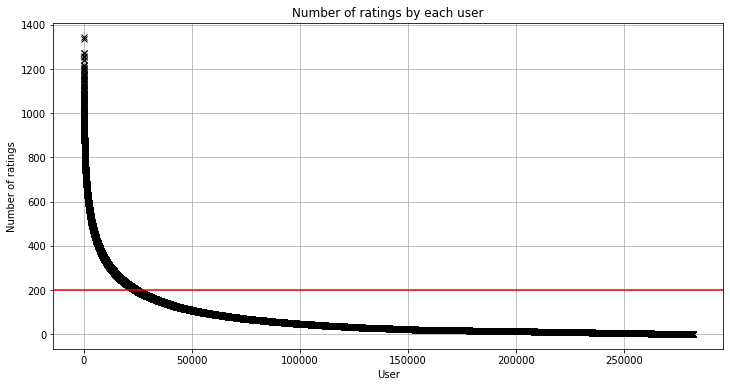

UserID - 191063 
Movies rated:  1343 

UserID - 94843 
Movies rated:  1338 

UserID - 242683 
Movies rated:  1273 

UserID - 60950 
Movies rated:  1273 

UserID - 109040 
Movies rated:  1261 



In [13]:
user_value_counts = ratings.userId.value_counts(sort=True)


print(f"Total number of users: {len(user_value_counts)}")

plt.figure(figsize=(12,6))
plt.plot(np.arange(len(user_value_counts)), user_value_counts, 'xk')
# plt.yscale('log')
plt.title('Number of ratings by each user')
plt.xlabel('User')
plt.ylabel('Number of ratings')
plt.axhline(200, c='red')
plt.grid('on')
plt.show()

for i in range(5):
    print("UserID -", user_value_counts.index[i], "\nMovies rated: ", user_value_counts.values[i],"\n")

del(user_value_counts)

In [14]:
ratings.userId.unique().shape

(281662,)

## We will reduce the number of users to those who have rated more than a threshold of movies

In [15]:
user_value_counts = ratings.userId.value_counts(sort=True)

u_threshold = 200

n_users = len(user_value_counts[user_value_counts >= u_threshold])

print("Number of users with more than {n} ratings submitted: {u}".format(n=u_threshold, u=n_users))


# list of user ids with more ratings given than threshold
eligibleUsers = user_value_counts[user_value_counts >= u_threshold].index.tolist()
length_after = len(ratings.loc[ratings['userId'].isin(eligibleUsers)])

print(f"\nRows potentially removed {len(ratings)-length_after}")

print(f"\nLength after removing {length_after}")

Number of users with more than 200 ratings submitted: 24158

Rows potentially removed 10501316

Length after removing 8576228


In [16]:
ratings.shape

(19077544, 4)

In [17]:
print(f"Rows kept: {8576228/27753444*100}%")


Rows kept: 30.901491000540332%


In [18]:
# list of user ids with more ratings given than threshold
eligibleUsers = user_value_counts[user_value_counts >= u_threshold].index.tolist()

ratings = ratings.loc[ratings['userId'].isin(eligibleUsers)]
ratings.shape

# ratingsFilteredMoviesDF.loc[ratingsFilteredMoviesDF['userId'].isin(eligibleUsers)].shape

(8576228, 4)

In [24]:
ratings = ratings.drop(columns=['timestamp'], axis=1)
ratings.head()

,userId,movieId,rating
42,4,1,4.0
43,4,2,4.0
44,4,5,2.0
45,4,6,4.5
46,4,10,4.0


## Overall stats

In [25]:
print(f"Number of Users: {len(ratings.userId.unique())}")
      
print(f"Number of movies: {len(ratings.movieId.unique())}")

Number of Users: 24158
Number of movies: 1344


In [26]:
24158/281662*100

8.576946836989014

In [27]:
ratings.shape

(8576228, 3)

In [28]:
24158*1344

32468352

# Write new data to csv

In [29]:
ratings.to_csv('MovieLensFilteredData/ratingsFiltered.csv', index=False)